# Object detection - Yolo


In [2]:
from yolov3 import *

model = make_yolov3_model()
weight_reader = WeightReader('Data/yolov3/yolov3.weights')
weight_reader.load_weights(model)
model.summary()

/opt/anaconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_0 (Conv2D)     │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_0             │ (None, None,      │        128 │ conv_0[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_0 (LeakyReLU) │ (None, None,      │          0 │ bnorm_0[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, None,      │          0 │ leaky_0[0][0]     │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1 (Conv2D)     │ (None, None,      │     18,432 │ zero_padding2d_5… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_1             │ (None, None,      │        256 │ conv_1[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_1 (LeakyReLU) │ (None, None,      │          0 │ bnorm_1[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2 (Conv2D)     │ (None, None,      │      2,048 │ leaky_1[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_2             │ (None, None,      │        128 │ conv_2[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_2 (LeakyReLU) │ (None, None,      │          0 │ bnorm_2[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3 (Conv2D)     │ (None, None,      │     18,432 │ leaky_2[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_3             │ (None, None,      │        256 │ conv_3[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_3 (LeakyReLU) │ (None, None,      │          0 │ bnorm_3[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_23 (Add)        │ (None, None,      │          0 │ leaky_1[0][0],    │
│                     │ None, 64)         │            │ leaky_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, None,      │          0 │ add_23[0][0]      │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5 (Conv2D)     │ (None, None,      │     73,728 │ zero_padding2d_6

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

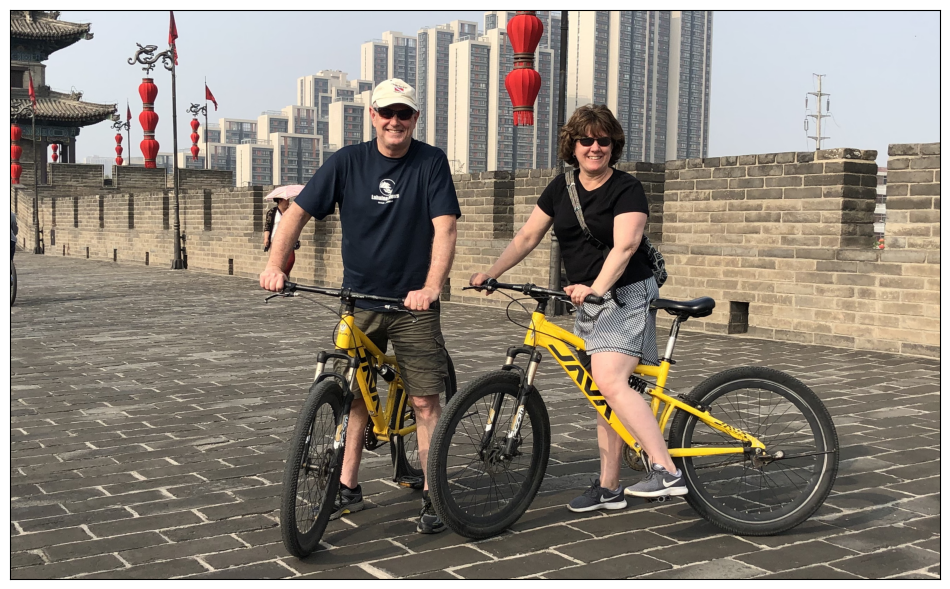

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imread('Data/yolov3/xian.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

In [4]:
# lets detect objects in the image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

x = load_img('Data/yolov3/xian.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

2025-12-24 15:25:20.983246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [5]:
boxes = decode_predictions(y, width, height)
annotate_image('Data/yolov3/xian.jpg', boxes)

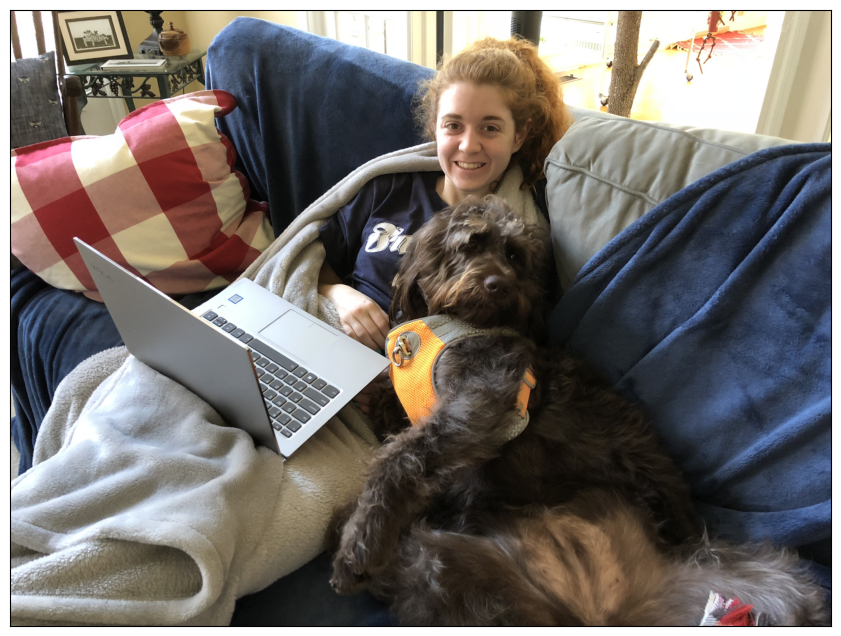

In [8]:
image = plt.imread('Data/yolov3/abby-lady.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

In [10]:
x = load_img('Data/yolov3/abby-lady.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


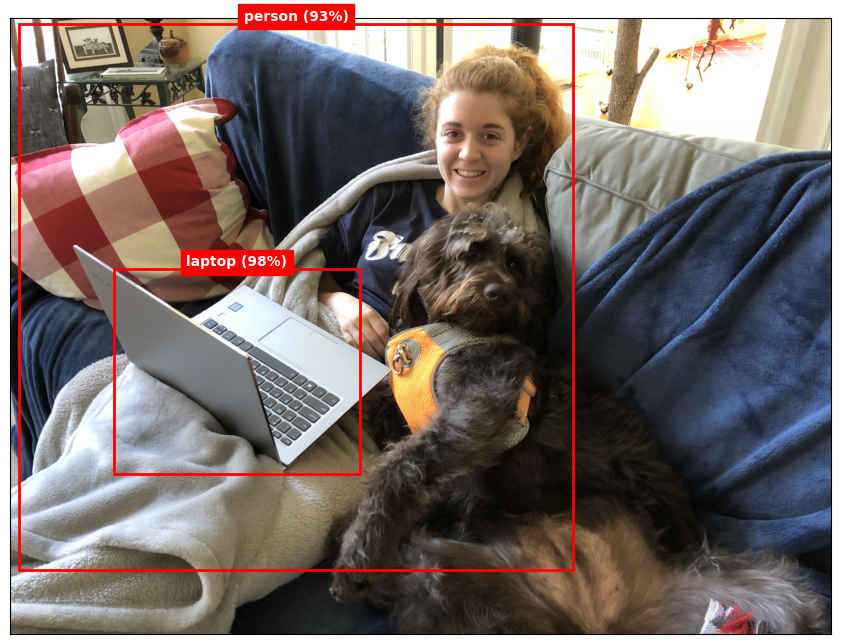

In [11]:
boxes = decode_predictions(y, width, height)
annotate_image('Data/yolov3/abby-lady.jpg', boxes)

In [13]:
# reduce the minimum confidence to 0.55 and see what happens
boxes = decode_predictions(y, width, height, min_score=0.55)
annotate_image('Data/yolov3/abby-lady.jpg', boxes)